# Read the csv file, ABALONE which is a type of mollusk or SEA snal. 
OBjective: To predict the number of rings on the snail as a function of the other variables

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [39]:
df_ab= pd.read_csv("abalone.csv")

In [40]:
df_ab.head(5)

,gender,length,diameter,height,whole-wt,shucked-wt,viscera-wt,shell-wt,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [41]:
# a. convert the column rings into your Y array. 

Y= df_ab["rings"].apply(lambda x: 0 if x <= 8 else( 1 if x == 9 or x == 10 else 2 ))

In [42]:
Y.head(5)

0    2
1    0
2    1
3    1
4    0
Name: rings, dtype: int64

In [43]:
Y= np.array(Y)

In [44]:
# b. column gender has three categrocial values, M, F, I 
# convert this column using 1-hot encoding

In [45]:
df_ab["gender"]= pd.get_dummies(df_ab["gender"])

In [46]:
df_ab.head(5)

,gender,length,diameter,height,whole-wt,shucked-wt,viscera-wt,shell-wt,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [52]:
X= pd.get_dummies(df_ab.drop(columns=["rings"]))
X= np.array(X)
X[:6]

array([[0.    , 0.455 , 0.365 , 0.095 , 0.514 , 0.2245, 0.101 , 0.15  ],
       [0.    , 0.35  , 0.265 , 0.09  , 0.2255, 0.0995, 0.0485, 0.07  ],
       [1.    , 0.53  , 0.42  , 0.135 , 0.677 , 0.2565, 0.1415, 0.21  ],
       [0.    , 0.44  , 0.365 , 0.125 , 0.516 , 0.2155, 0.114 , 0.155 ],
       [0.    , 0.33  , 0.255 , 0.08  , 0.205 , 0.0895, 0.0395, 0.055 ],
       [0.    , 0.425 , 0.3   , 0.095 , 0.3515, 0.141 , 0.0775, 0.12  ]])

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components= 3)
pca.fit_transform(X)

array([[-0.47316493,  0.11463582, -0.00317505],
       [-0.79042495, -0.04194235,  0.02655175],
       [ 0.14696906, -0.69537448, -0.04400306],
       ...,
       [ 0.23632421,  0.46638553,  0.00864582],
       [ 0.61687237, -0.46054561,  0.03738944],
       [ 1.04142999,  0.86921595,  0.12400926]])

In [55]:
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [56]:
KNN= KN(n_neighbors= 5)
KNNscores= cross_val_score(KNN, X, Y, cv= 10)
print(np.mean(KNNscores), np.std(KNNscores))

0.6090467339047422 0.017023197509400855


In [57]:
# using QDA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [58]:
qda= QDA()
qda.fit(X, Y)
qda_scores= cross_val_score(qda, X, Y, cv=10)
print(np.mean(qda_scores), np.std(qda_scores))

0.6123902791642284 0.038833139301826206


In [59]:
# Now using the NEURAL network to get SCORE which could be better than QDA or KNN
# Try to vary the number and layers and sizes of the hidden LAYERS

In [61]:
from sklearn.neural_network import MLPClassifier as NN

In [64]:
nn_class= NN(alpha= 1e-5, max_iter=5000, hidden_layer_sizes=(2,3,3), random_state= 1)
ANN_scores= cross_val_score(nn_class, X, Y, cv= 10, scoring='accuracy')
print(np.mean(ANN_scores), np.std(ANN_scores))

0.6243634757265957 0.03448293242481077


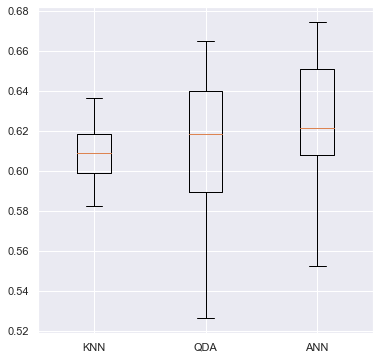

In [66]:
# make a box plot
plt.boxplot( [KNNscores, qda_scores, ANN_scores])
plt.xticks([1,2,3] , ('KNN', 'QDA', 'ANN'))
plt.gcf().set_size_inches(6,6)
plt.show()